In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import json


# 한글 폰트 설정 (그래프에 한글이 깨지지 않도록)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

6. 산지별 비교

In [2]:
df = pd.read_csv("C:\\Users\\user\\jupyter\\fruits2.csv")
df

SALEDATE WHSAL_NM   CMP_NM PUM_NM   KIND_NM DAN_NM POJ_NM LV_NM  \
0        2020-12-31   서울가락도매     중앙청과     감귤      기타감귤     kg     상자     특   
1        2020-12-31   서울가락도매     서울청과     감귤      기타감귤     kg     상자     특   
2        2020-12-31   서울가락도매     중앙청과     감귤      기타감귤     kg     상자     특   
3        2020-12-31   부산엄궁도매     부산청과     감귤       조생귤     kg     상자     특   
4        2020-12-31   서울가락도매     서울청과     감귤      기타감귤     kg     상자     특   
...             ...      ...      ...    ...       ...    ...    ...   ...   
3453947  2023-01-02   대구북부도매   대구중앙청과   파인애플  파인애플(수입)     kg     상자     상   
3453948  2023-01-02   대구북부도매     효성청과   파인애플  파인애플(수입)     kg     상자    등외   
3453949  2023-01-02   대구북부도매     효성청과   파인애플  파인애플(수입)     kg     상자    등외   
3453950  2023-01-02   익산도매시장  익산원협(공)   파인애플    기타파인애플     kg     상자     특   
3453951  2023-01-02   대구북부도매     대양청과   파인애플  파인애플(수입)     kg     상자     상   

           SAN_NM  DANQ      QTY          COST  TOT_QTY   TOT_AMT  
0         제주도 제주시   5.0  15030.0   6652.827678  75150.0  99992000  
1        경상남도 창원시   5.0  14935.0   6319.417476  74675.0  94380500  
2        제주도 서귀포시   5.0  11726.0   6084.726249  58630.0  71349500  
3         제주도 제주시   5.0  10692.0   7434.689487  53460.0  79491700  
4        경상남도 창녕군   5.0   8364.0   6854.686753  41820.0  57332600  
...           ...   ...      ...           ...      ...       ...  
3453947       수입산  13.0     12.0  30000.000000    156.0    360000  
3453948       필리핀  12.0      6.0  31000.000000     72.0    186000  
3453949       필리핀  13.0      3.0  30000.000000     39.0     90000  
3453950    전북 완주군  12.0      2.0  27000.000000     24.0     54000  
3453951       필리핀  12.0      2.0  26000.000000     24.0     52000  

[3453952 rows x 14 columns]

- 행정구역
    - 강원도
    - 경기도
    - 경상북도
    - 경상남도
    - 전라북도
    - 전라남도
    - 충청북도
    - 충청남도
    - 서울특별시
    - 세종특별자치시
    - 부산광역시
    - 인천광역시
    - 광주광역시
    - 대전광역시
    - 울산광역시

- 수입산 산지 삭제, 국내 주소만 남김

In [3]:
df= df[df['SAN_NM'].str.contains('시|군|구|도')]
df

SALEDATE WHSAL_NM   CMP_NM PUM_NM   KIND_NM DAN_NM POJ_NM LV_NM  \
0        2020-12-31   서울가락도매     중앙청과     감귤      기타감귤     kg     상자     특   
1        2020-12-31   서울가락도매     서울청과     감귤      기타감귤     kg     상자     특   
2        2020-12-31   서울가락도매     중앙청과     감귤      기타감귤     kg     상자     특   
3        2020-12-31   부산엄궁도매     부산청과     감귤       조생귤     kg     상자     특   
4        2020-12-31   서울가락도매     서울청과     감귤      기타감귤     kg     상자     특   
...             ...      ...      ...    ...       ...    ...    ...   ...   
3453930  2023-01-03   익산도매시장     이리청과   파인애플  파인애플(수입)     kg     상자     .   
3453934  2023-01-03   정읍도매시장  정읍원협(공)   파인애플    기타파인애플     kg     상자     .   
3453941  2023-01-02   원주도매시장  원주원협(공)   파인애플    기타파인애플     kg     상자     특   
3453943  2023-01-02   구미도매시장  구미농협(공)   파인애플    기타파인애플     kg    파렛트     .   
3453950  2023-01-02   익산도매시장  익산원협(공)   파인애플    기타파인애플     kg     상자     특   

           SAN_NM  DANQ      QTY          COST  TOT_QTY   TOT_AMT  
0         제주도 제주시   5.0  15030.0   6652.827678  75150.0  99992000  
1        경상남도 창원시   5.0  14935.0   6319.417476  74675.0  94380500  
2        제주도 서귀포시   5.0  11726.0   6084.726249  58630.0  71349500  
3         제주도 제주시   5.0  10692.0   7434.689487  53460.0  79491700  
4        경상남도 창녕군   5.0   8364.0   6854.686753  41820.0  57332600  
...           ...   ...      ...           ...      ...       ...  
3453930    전북 익산시  10.0      2.0  27000.000000     20.0     54000  
3453934     광주광역시  12.0      1.0  29040.000000     12.0     29040  
3453941    서울 송파구  12.0     37.0  28642.162162    444.0   1059760  
3453943     대구광역시  20.0     20.0  27200.000000    400.0    544000  
3453950    전북 완주군  12.0      2.0  27000.000000     24.0     54000  

[3183908 rows x 14 columns]

In [4]:
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b강원\b', '강원도', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b경기\b', '경기도', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace('경남', '경상남도')
df['SAN_NM'] = df['SAN_NM'].str.replace('경북', '경상북도')
df['SAN_NM'] = df['SAN_NM'].str.replace('전남', '전라남도')
df['SAN_NM'] = df['SAN_NM'].str.replace('전북', '전라북도')
df['SAN_NM'] = df['SAN_NM'].str.replace('충남', '충청남도')
df['SAN_NM'] = df['SAN_NM'].str.replace('충북', '충청북도')
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b서울\b', '서울특별시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace('세종시', '세종특별자치시')
df['SAN_NM'] = df['SAN_NM'].str.replace('제주도', '제주특별자치도')
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b부산\b', '부산광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b대구\b', '대구광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b인천\b', '인천광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b광주\b', '광주광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b대전\b', '대전광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b울산\b', '울산광역시', regex=True)

C:\Users\user\AppData\Local\Temp\ipykernel_35544\317138262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b강원\b', '강원도', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_35544\317138262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b경기\b', '경기도', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_35544\317138262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [5]:
df_apple = df[df['PUM_NM']=='사과']
df_kmelon = df[df['PUM_NM']=='참외']
df_tangerine = df[df['PUM_NM']=='감귤']
df_banana = df[df['PUM_NM']=='바나나']
df_peach = df[df['PUM_NM']=='복숭아']
df_kiwi = df[df['PUM_NM']=='참다래(키위)']
df_plum = df[df['PUM_NM']=='자두']
df_pineapple = df[df['PUM_NM']=='파인애플']


In [6]:
new_san = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', 
            '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', 
            '경상북도', '경상남도', '제주특별자치도']

In [7]:
def df_fruits(df, new_san):
    san_df =pd.DataFrame({'SAN': new_san})
    mean_costs = []
    tot_qtys =[]

    for san in new_san:
        filter_san = df[df['SAN_NM'].str.contains(san)]
        mean_cost = filter_san['COST'].mean()
        tot_qty = filter_san['TOT_QTY'].sum()
        mean_costs.append(mean_cost)
        tot_qtys.append(tot_qty)

    san_df['MEAN_COST'] = mean_costs
    san_df['TOT_QTY'] = tot_qtys
    return san_df

In [8]:
fruits = [ 'apple', 'kmelon', 'tangerine', 'banana', 'peach', 'kiwi', 'plum', 'pineapple']
df_dict = {name: globals()[f'df_{name}'] for name in fruits}

fruit_dfs = {name: df_fruits(df, new_san) for name, df in df_dict.items()}

for name, summary_df in fruit_dfs.items():
    
    print(f"{name} summary:")
    print(summary_df)
    print()

apple summary:
        SAN      MEAN_COST       TOT_QTY
0     서울특별시   36237.497775  1.067430e+06
1     부산광역시   26902.490935  5.512664e+06
2     대구광역시   24839.741969  1.253368e+07
3     인천광역시   29410.053336  5.140220e+04
4     광주광역시   28698.008463  6.161086e+06
5     대전광역시   24012.303035  2.699862e+06
6     울산광역시   33113.239069  1.422986e+06
7   세종특별자치시   16820.910720  1.495000e+03
8       경기도  187306.888570  1.437683e+07
9       강원도   47961.200455  2.184182e+07
10     충청북도   33784.792941  1.060669e+08
11     충청남도   29305.495132  2.469037e+07
12     전라북도   37475.510365  7.471511e+07
13     전라남도   31200.897658  1.030998e+07
14     경상북도   42181.715334  7.722914e+08
15     경상남도   31055.212962  1.169390e+08
16  제주특별자치도   26085.546466  1.021081e+05

kmelon summary:
        SAN     MEAN_COST       TOT_QTY
0     서울특별시  35079.535357  8.741280e+05
1     부산광역시  20235.312356  8.222908e+05
2     대구광역시  27695.665101  1.423446e+07
3     인천광역시  30339.724122  7.142660e+04
4     광주광역시  37454.637481  1.6

In [9]:
# 모든 데이터프레임의 결측값을 처리하는 코드
for name, df in fruit_dfs.items():
    df['MEAN_COST'] = df['MEAN_COST'].fillna(0)
    df['TOT_QTY'] = df['TOT_QTY'].fillna(0)
# 결과 출력
for name, df in fruit_dfs.items():
    print(f"{name} summary:")
    print(df)
    print()


apple summary:
        SAN      MEAN_COST       TOT_QTY
0     서울특별시   36237.497775  1.067430e+06
1     부산광역시   26902.490935  5.512664e+06
2     대구광역시   24839.741969  1.253368e+07
3     인천광역시   29410.053336  5.140220e+04
4     광주광역시   28698.008463  6.161086e+06
5     대전광역시   24012.303035  2.699862e+06
6     울산광역시   33113.239069  1.422986e+06
7   세종특별자치시   16820.910720  1.495000e+03
8       경기도  187306.888570  1.437683e+07
9       강원도   47961.200455  2.184182e+07
10     충청북도   33784.792941  1.060669e+08
11     충청남도   29305.495132  2.469037e+07
12     전라북도   37475.510365  7.471511e+07
13     전라남도   31200.897658  1.030998e+07
14     경상북도   42181.715334  7.722914e+08
15     경상남도   31055.212962  1.169390e+08
16  제주특별자치도   26085.546466  1.021081e+05

kmelon summary:
        SAN     MEAN_COST       TOT_QTY
0     서울특별시  35079.535357  8.741280e+05
1     부산광역시  20235.312356  8.222908e+05
2     대구광역시  27695.665101  1.423446e+07
3     인천광역시  30339.724122  7.142660e+04
4     광주광역시  37454.637481  1.6

In [9]:
apple = fruit_dfs['apple']
kmelon = fruit_dfs['kmelon']
tangerine = fruit_dfs['tangerine']
banana = fruit_dfs['banana']
peach = fruit_dfs['peach']
kiwi = fruit_dfs['kiwi']
plum = fruit_dfs['plum']
pineapple = fruit_dfs['pineapple']

In [10]:
apple['MEAN_COST'] = apple['MEAN_COST'].fillna(0)
kmelon['MEAN_COST'] = kmelon['MEAN_COST'].fillna(0)
tangerine['MEAN_COST'] = tangerine['MEAN_COST'].fillna(0)
banana['MEAN_COST'] = banana['MEAN_COST'].fillna(0)
peach['MEAN_COST'] = peach['MEAN_COST'].fillna(0)
kiwi['MEAN_COST'] = kiwi['MEAN_COST'].fillna(0)
plum['MEAN_COST'] = plum['MEAN_COST'].fillna(0)
pineapple['MEAN_COST'] = pineapple['MEAN_COST'].fillna(0)

- 행정구역별 평균단가와 거래량 비교

- 사과

C:\Users\user\AppData\Local\Temp\ipykernel_35544\3727489623.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_35544\3727489623.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty,  palette='Oranges_d')


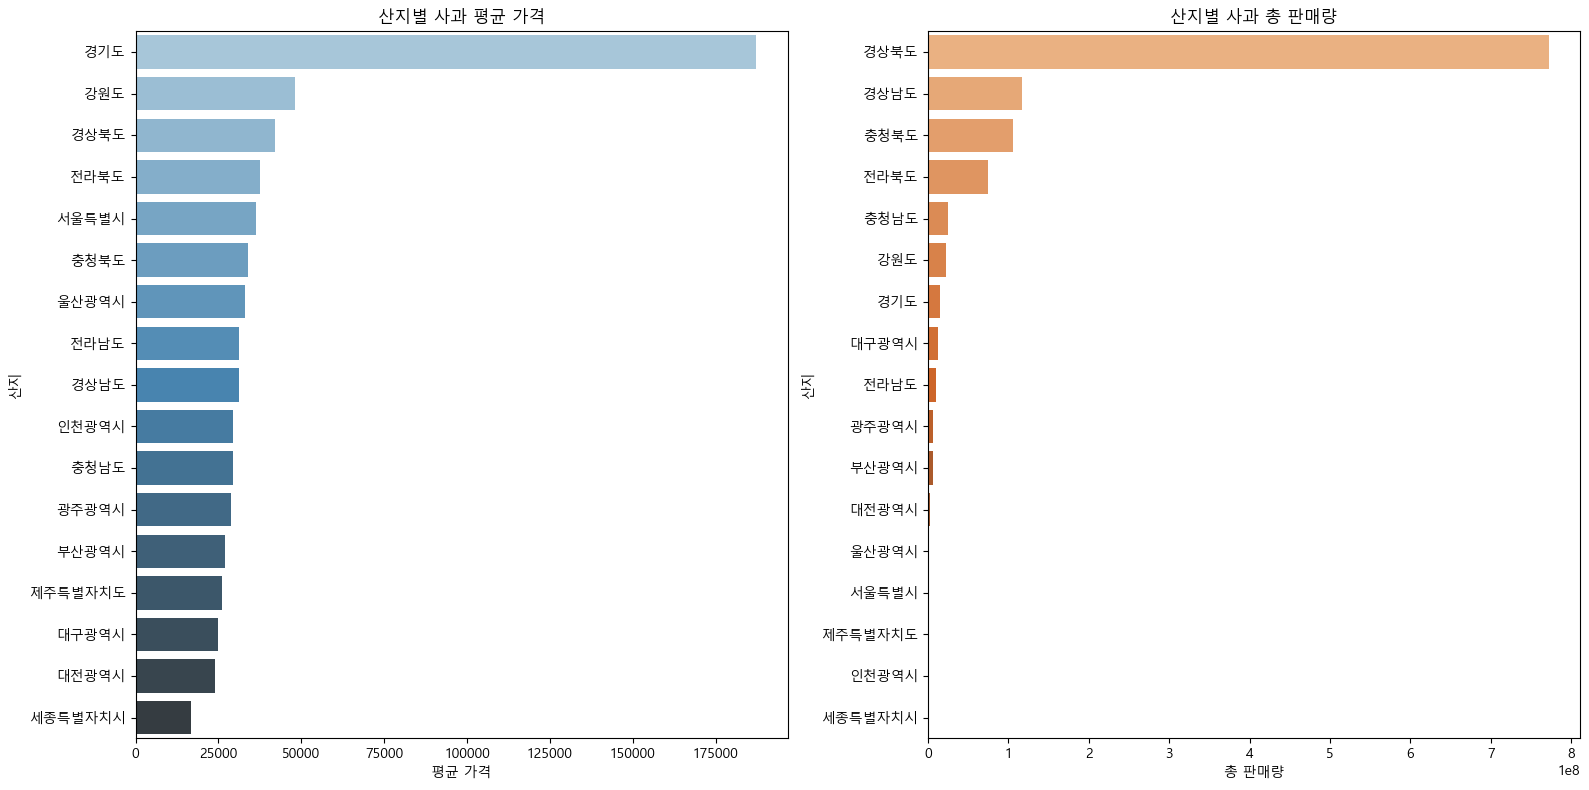

In [12]:
def plot_fruit_data(fruit_df, fruit_name):
    plt.figure(figsize=(16, 8))

    # 평균 가격 (MEAN_COST)
    fruit_cost = fruit_df.sort_values(by='MEAN_COST', ascending=False)
    plt.subplot(1, 2, 1)
    sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
    plt.title(f'산지별 {fruit_name} 평균 가격')
    plt.ylabel('산지')
    plt.xlabel('평균 가격')

    # 총 판매량 (TOT_QTY)
    fruit_qty = fruit_df.sort_values(by='TOT_QTY', ascending=False)
    plt.subplot(1, 2, 2)
    sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty,  palette='Oranges_d')
    plt.title(f'산지별 {fruit_name} 총 판매량')
    plt.ylabel('산지')
    plt.xlabel('총 판매량')

    plt.tight_layout()
    plt.show()

# 각 품목에 대해 시각화 실행
plot_fruit_data(apple, '사과')

- 참외

C:\Users\user\AppData\Local\Temp\ipykernel_35544\2645013704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_35544\2645013704.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')


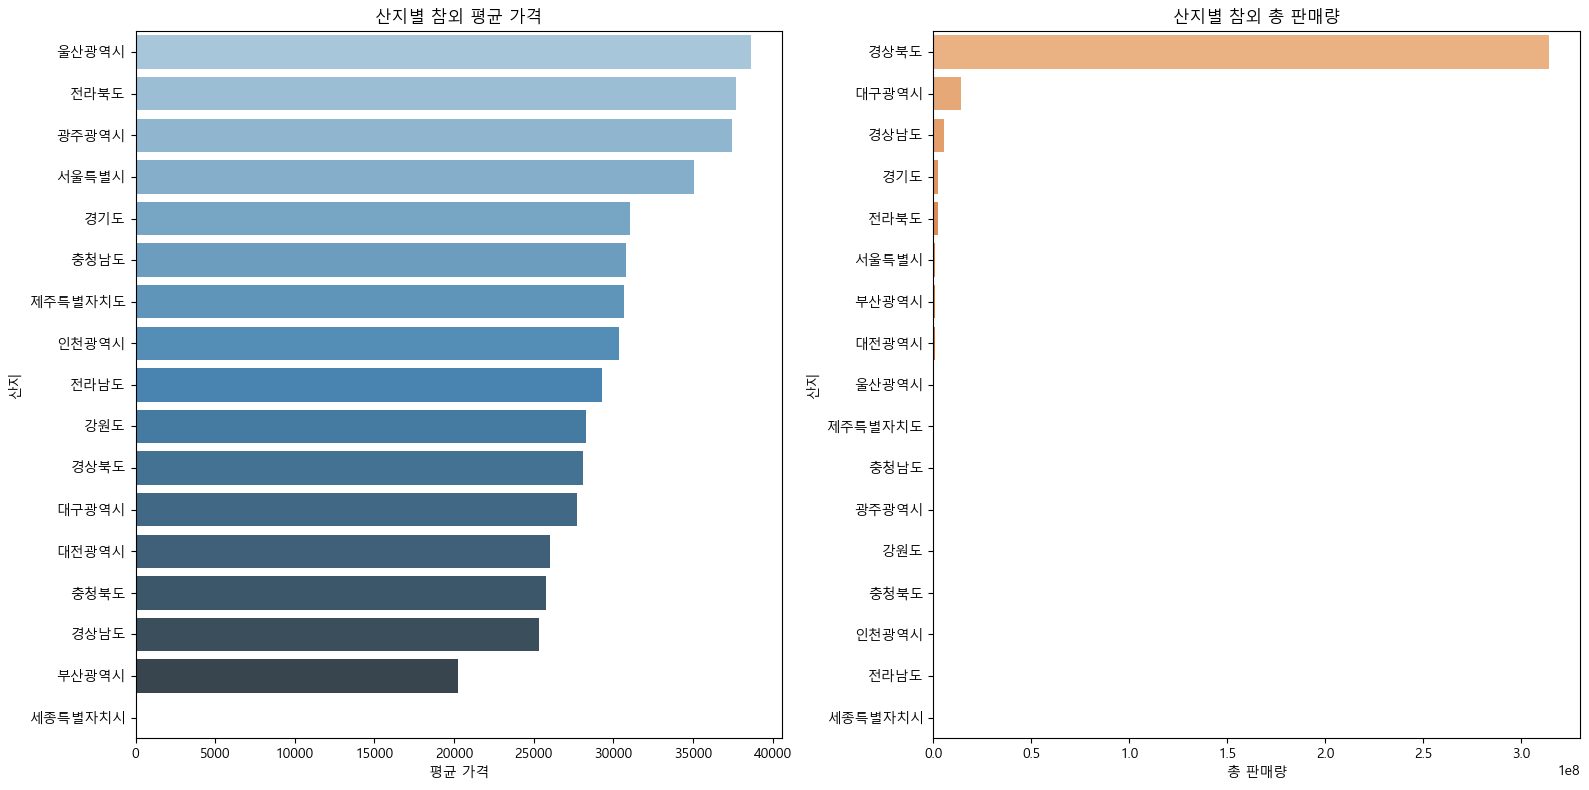

In [13]:
def plot_fruit_data(fruit_df, fruit_name):
    plt.figure(figsize=(16, 8))

    # 평균 가격 (MEAN_COST) - 파란색 계열 (진한 색상)
    fruit_cost = fruit_df.sort_values(by='MEAN_COST', ascending=False)
    plt.subplot(1, 2, 1)
    sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
    plt.title(f'산지별 {fruit_name} 평균 가격')
    plt.ylabel('산지')
    plt.xlabel('평균 가격')

    # 총 판매량 (TOT_QTY) - 주황색 계열 (진한 색상)
    fruit_qty = fruit_df.sort_values(by='TOT_QTY', ascending=False)
    plt.subplot(1, 2, 2)
    sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')
    plt.title(f'산지별 {fruit_name} 총 판매량')
    plt.ylabel('산지')
    plt.xlabel('총 판매량')

    plt.tight_layout()
    plt.show()


plot_fruit_data(kmelon, '참외')


- 감귤

C:\Users\user\AppData\Local\Temp\ipykernel_35544\464303201.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_35544\464303201.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')


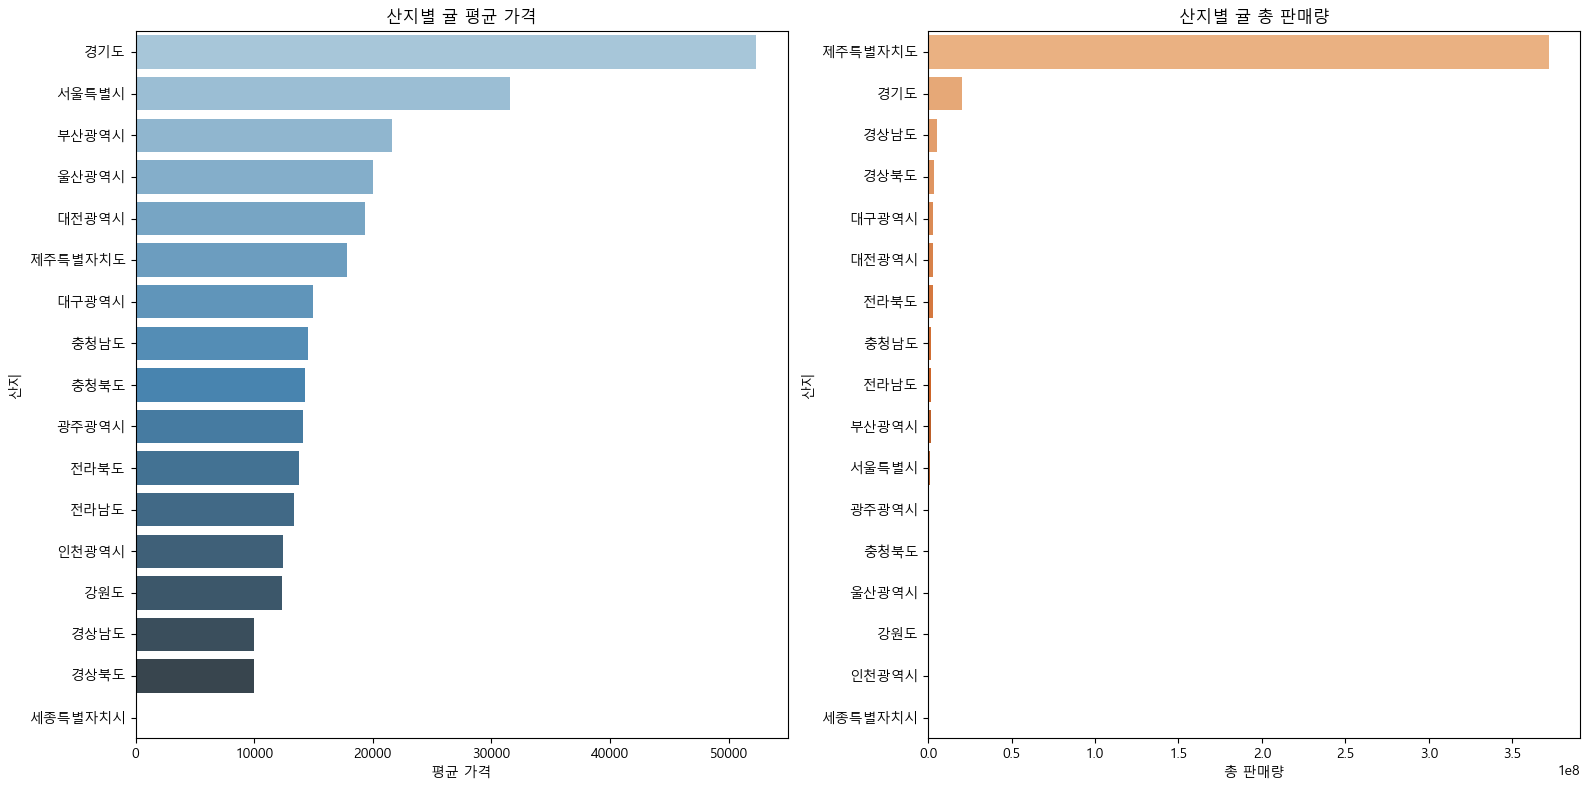

In [14]:
def plot_fruit_data(fruit_df, fruit_name):
    plt.figure(figsize=(16, 8))

    # 평균 가격 (MEAN_COST) - 파란색 계열 (진한 색상)
    fruit_cost = fruit_df.sort_values(by='MEAN_COST', ascending=False)
    plt.subplot(1, 2, 1)
    sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
    plt.title(f'산지별 {fruit_name} 평균 가격')
    plt.ylabel('산지')
    plt.xlabel('평균 가격')

    # 총 판매량 (TOT_QTY) - 주황색 계열 (진한 색상)
    fruit_qty = fruit_df.sort_values(by='TOT_QTY', ascending=False)
    plt.subplot(1, 2, 2)
    sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')
    plt.title(f'산지별 {fruit_name} 총 판매량')
    plt.ylabel('산지')
    plt.xlabel('총 판매량')

    plt.tight_layout()
    plt.show()


plot_fruit_data(tangerine, '귤')


- 바나나

C:\Users\user\AppData\Local\Temp\ipykernel_35544\4187873473.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_35544\4187873473.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')


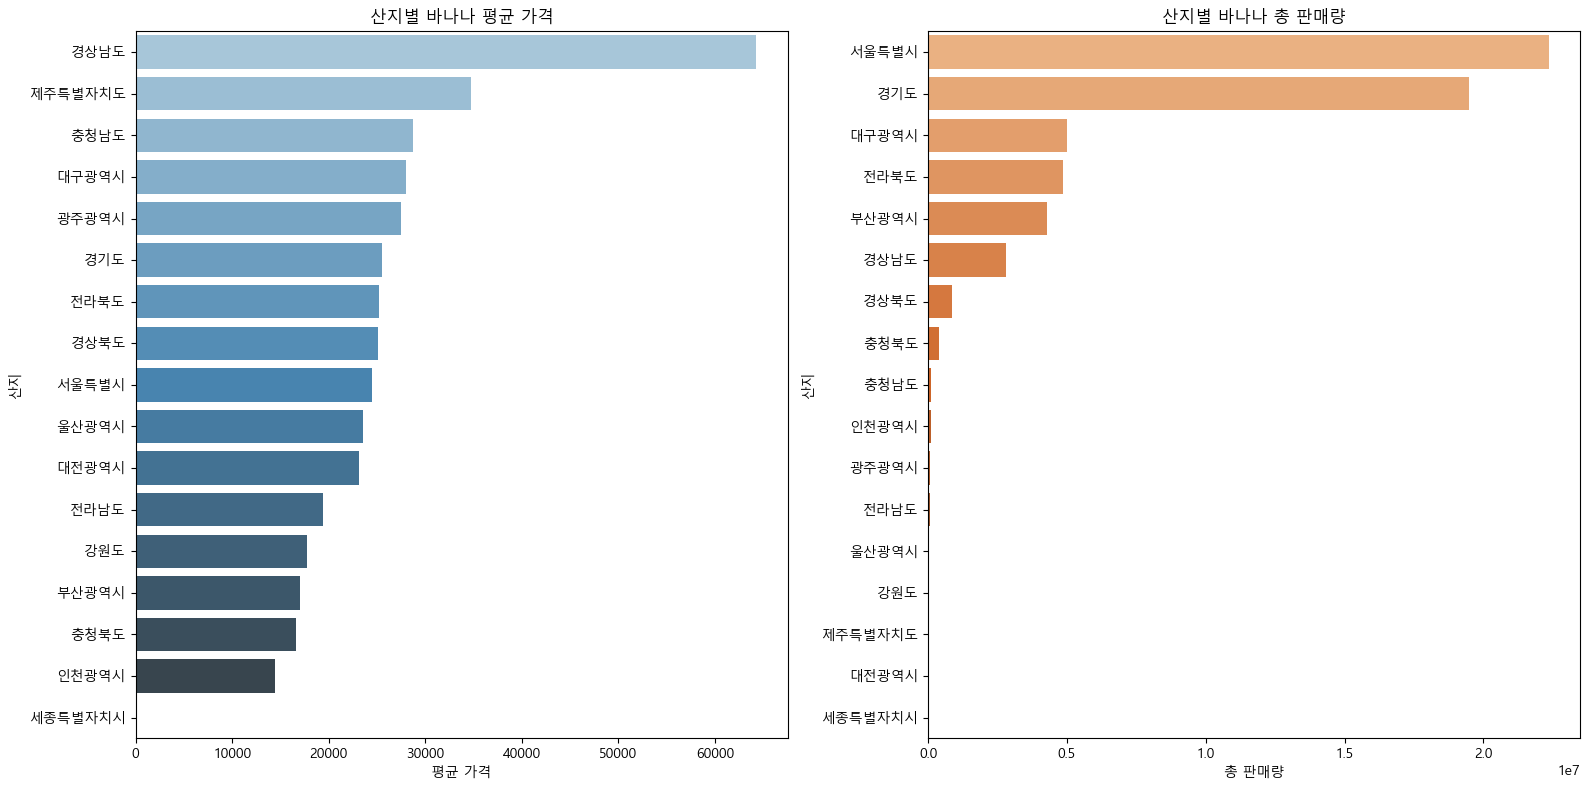

In [15]:
def plot_fruit_data(fruit_df, fruit_name):
    plt.figure(figsize=(16, 8))

    # 평균 가격 (MEAN_COST) - 파란색 계열 (진한 색상)
    fruit_cost = fruit_df.sort_values(by='MEAN_COST', ascending=False)
    plt.subplot(1, 2, 1)
    sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
    plt.title(f'산지별 {fruit_name} 평균 가격')
    plt.ylabel('산지')
    plt.xlabel('평균 가격')

    # 총 판매량 (TOT_QTY) - 주황색 계열 (진한 색상)
    fruit_qty = fruit_df.sort_values(by='TOT_QTY', ascending=False)
    plt.subplot(1, 2, 2)
    sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')
    plt.title(f'산지별 {fruit_name} 총 판매량')
    plt.ylabel('산지')
    plt.xlabel('총 판매량')

    plt.tight_layout()
    plt.show()

plot_fruit_data(banana, '바나나')


- 복숭아

C:\Users\user\AppData\Local\Temp\ipykernel_35544\3065129299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_35544\3065129299.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')


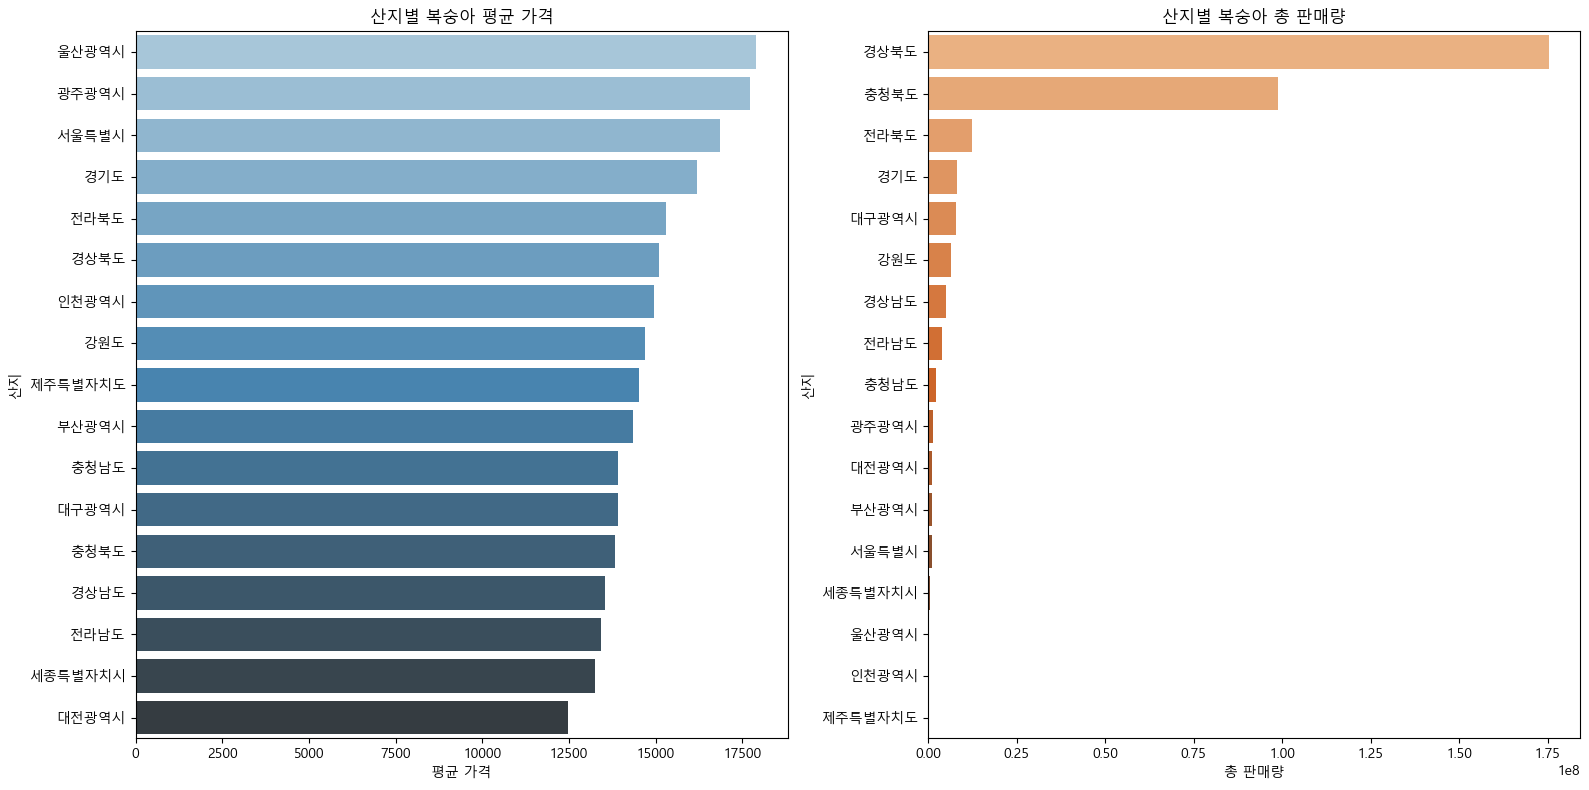

In [16]:
def plot_fruit_data(fruit_df, fruit_name):
    plt.figure(figsize=(16, 8))

    # 평균 가격 (MEAN_COST) - 파란색 계열 (진한 색상)
    fruit_cost = fruit_df.sort_values(by='MEAN_COST', ascending=False)
    plt.subplot(1, 2, 1)
    sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
    plt.title(f'산지별 {fruit_name} 평균 가격')
    plt.ylabel('산지')
    plt.xlabel('평균 가격')

    # 총 판매량 (TOT_QTY) - 주황색 계열 (진한 색상)
    fruit_qty = fruit_df.sort_values(by='TOT_QTY', ascending=False)
    plt.subplot(1, 2, 2)
    sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')
    plt.title(f'산지별 {fruit_name} 총 판매량')
    plt.ylabel('산지')
    plt.xlabel('총 판매량')

    plt.tight_layout()
    plt.show()


plot_fruit_data(peach, '복숭아')


- 키위

C:\Users\user\AppData\Local\Temp\ipykernel_35544\1120329234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_35544\1120329234.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')


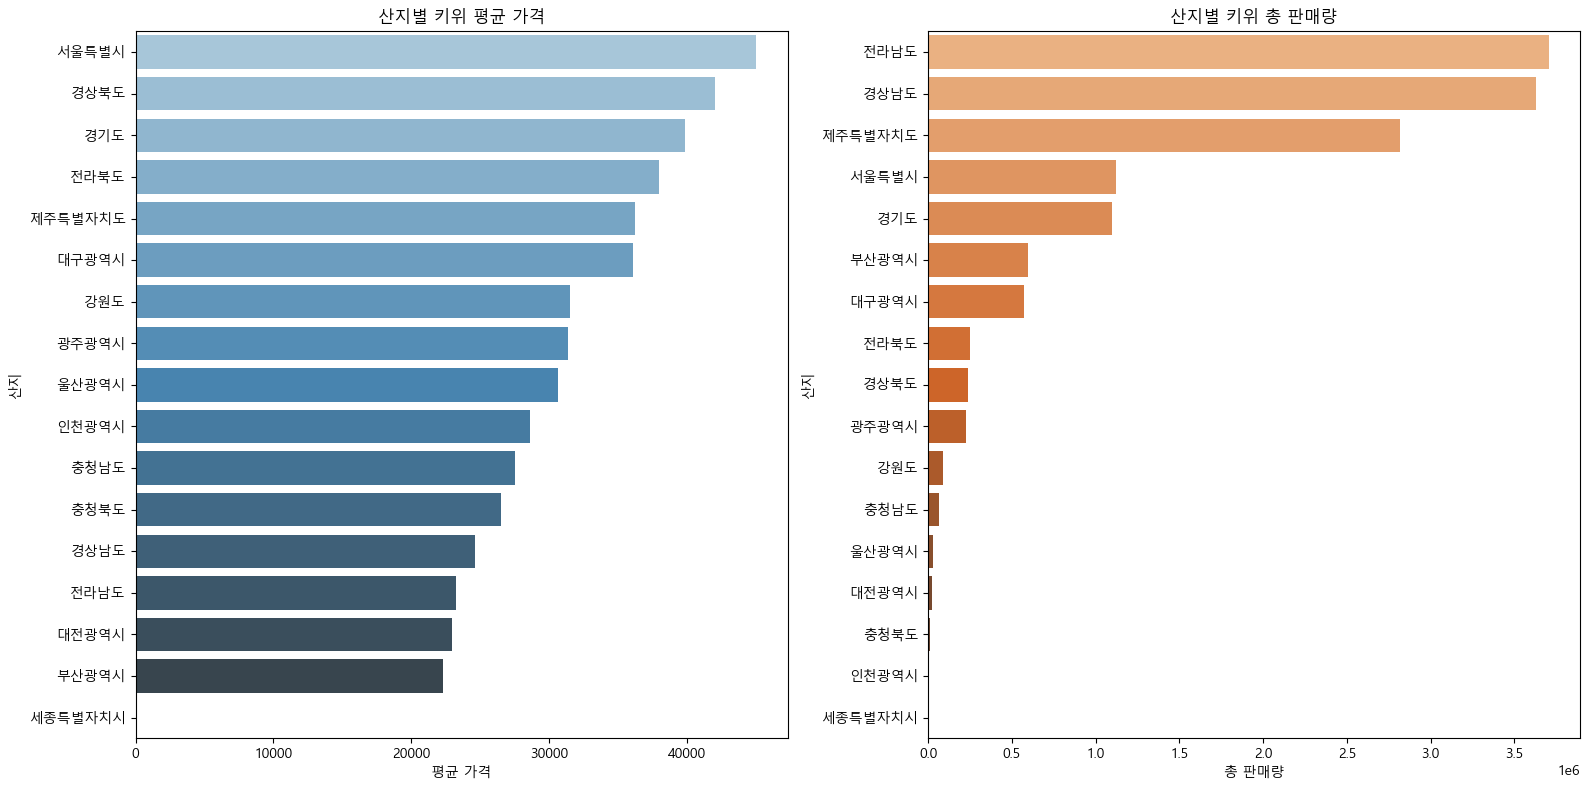

In [17]:
def plot_fruit_data(fruit_df, fruit_name):
    plt.figure(figsize=(16, 8))

    # 평균 가격 (MEAN_COST) - 파란색 계열 (진한 색상)
    fruit_cost = fruit_df.sort_values(by='MEAN_COST', ascending=False)
    plt.subplot(1, 2, 1)
    sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
    plt.title(f'산지별 {fruit_name} 평균 가격')
    plt.ylabel('산지')
    plt.xlabel('평균 가격')

    # 총 판매량 (TOT_QTY) - 주황색 계열 (진한 색상)
    fruit_qty = fruit_df.sort_values(by='TOT_QTY', ascending=False)
    plt.subplot(1, 2, 2)
    sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')
    plt.title(f'산지별 {fruit_name} 총 판매량')
    plt.ylabel('산지')
    plt.xlabel('총 판매량')

    plt.tight_layout()
    plt.show()


plot_fruit_data(kiwi, '키위')


- 자두

C:\Users\user\AppData\Local\Temp\ipykernel_35544\1157529606.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_35544\1157529606.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')


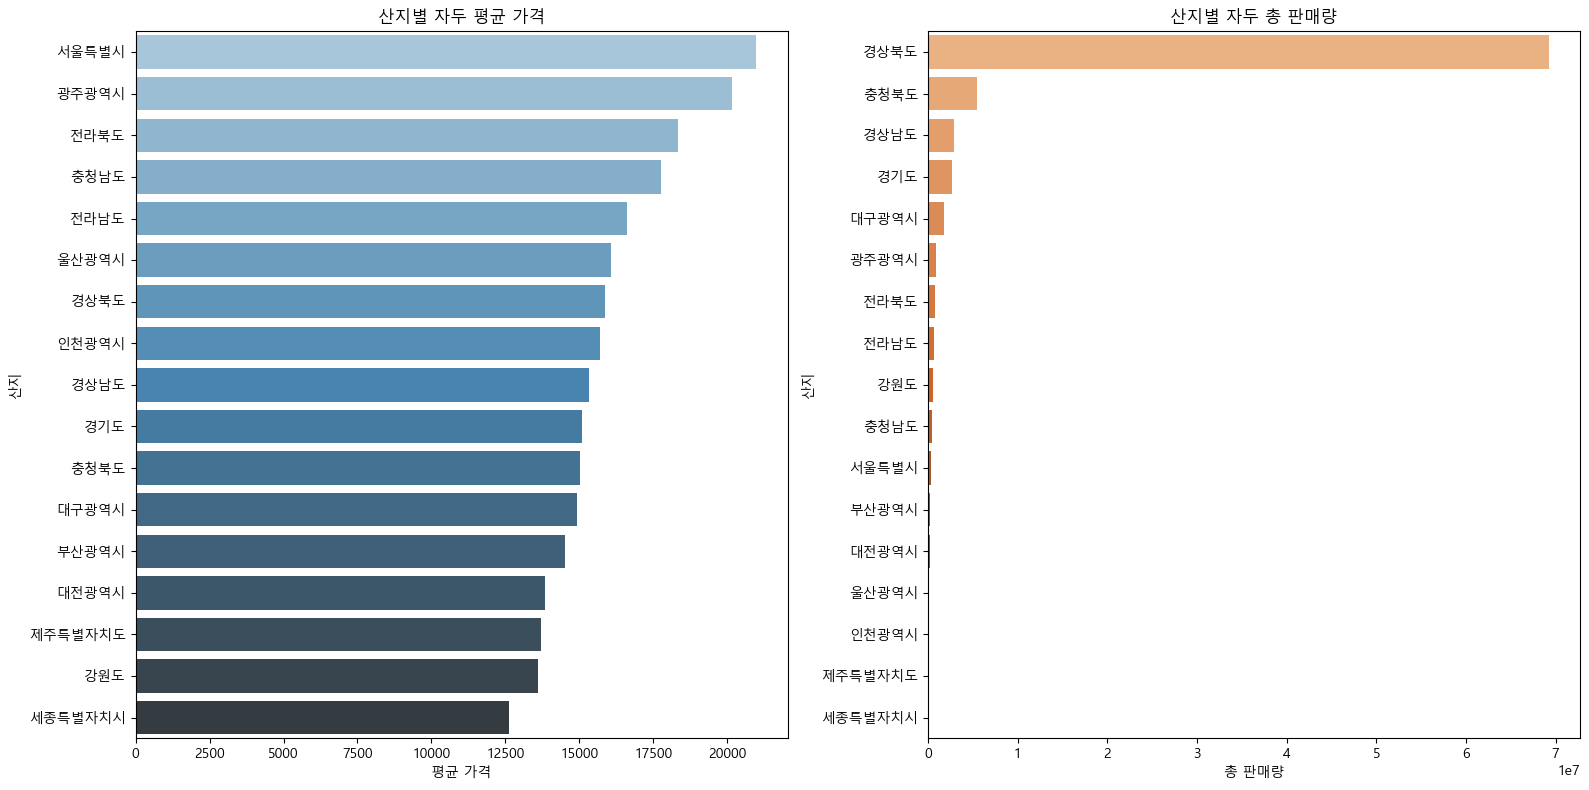

In [18]:
def plot_fruit_data(fruit_df, fruit_name):
    plt.figure(figsize=(16, 8))

    # 평균 가격 (MEAN_COST) - 파란색 계열 (진한 색상)
    fruit_cost = fruit_df.sort_values(by='MEAN_COST', ascending=False)
    plt.subplot(1, 2, 1)
    sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
    plt.title(f'산지별 {fruit_name} 평균 가격')
    plt.ylabel('산지')
    plt.xlabel('평균 가격')

    # 총 판매량 (TOT_QTY) - 주황색 계열 (진한 색상)
    fruit_qty = fruit_df.sort_values(by='TOT_QTY', ascending=False)
    plt.subplot(1, 2, 2)
    sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')
    plt.title(f'산지별 {fruit_name} 총 판매량')
    plt.ylabel('산지')
    plt.xlabel('총 판매량')

    plt.tight_layout()
    plt.show()


plot_fruit_data(plum, '자두')


- 파인애플

C:\Users\user\AppData\Local\Temp\ipykernel_35544\3684465608.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_35544\3684465608.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')


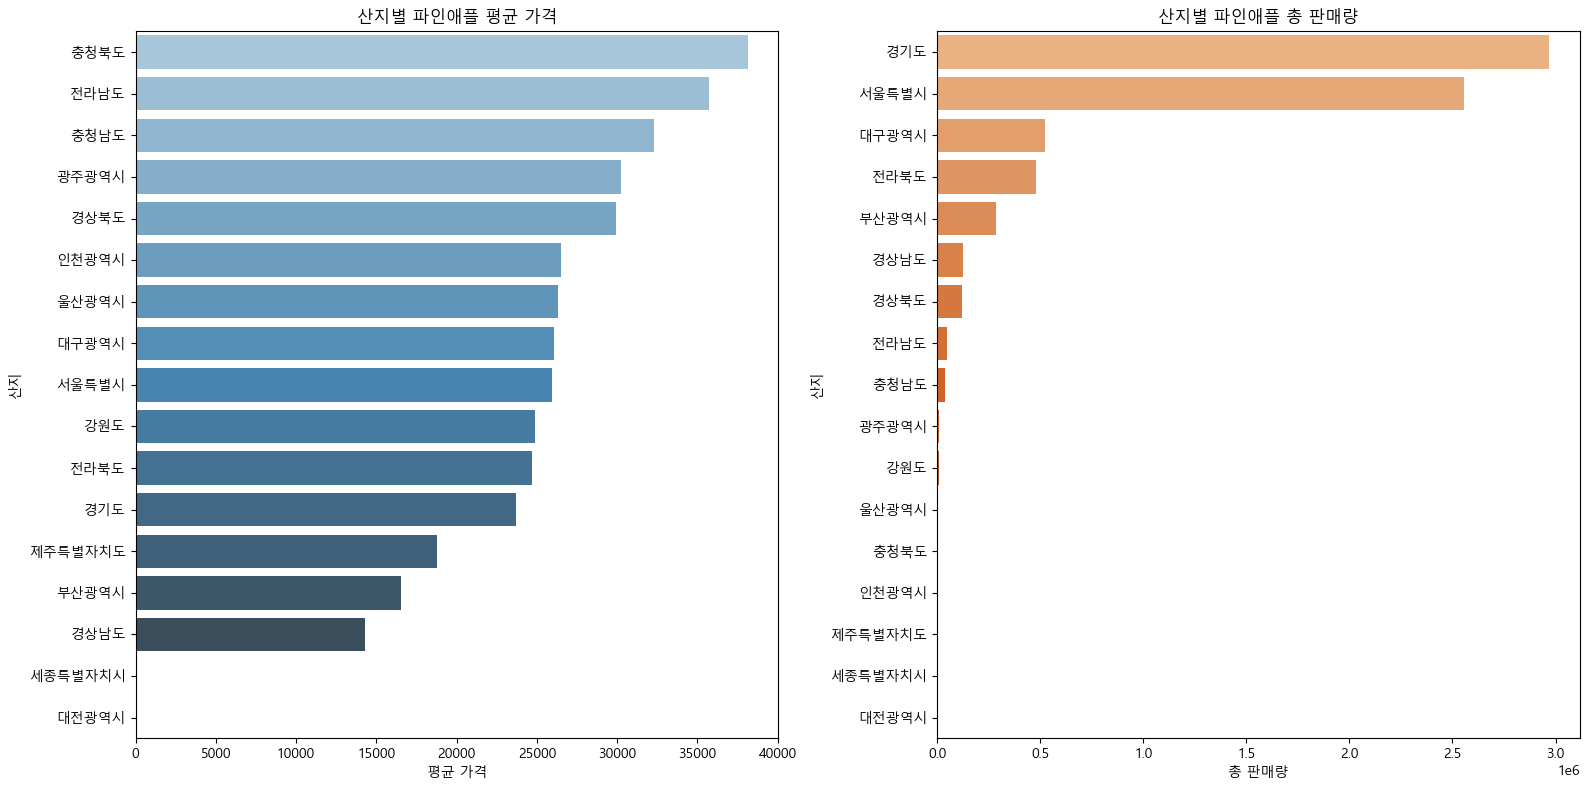

In [19]:
def plot_fruit_data(fruit_df, fruit_name):
    plt.figure(figsize=(16, 8))

    # 평균 가격 (MEAN_COST) - 파란색 계열 (진한 색상)
    fruit_cost = fruit_df.sort_values(by='MEAN_COST', ascending=False)
    plt.subplot(1, 2, 1)
    sns.barplot(x='MEAN_COST', y='SAN', data=fruit_cost, palette='Blues_d')
    plt.title(f'산지별 {fruit_name} 평균 가격')
    plt.ylabel('산지')
    plt.xlabel('평균 가격')

    # 총 판매량 (TOT_QTY) - 주황색 계열 (진한 색상)
    fruit_qty = fruit_df.sort_values(by='TOT_QTY', ascending=False)
    plt.subplot(1, 2, 2)
    sns.barplot(x='TOT_QTY', y='SAN', data=fruit_qty, palette='Oranges_d')
    plt.title(f'산지별 {fruit_name} 총 판매량')
    plt.ylabel('산지')
    plt.xlabel('총 판매량')

    plt.tight_layout()
    plt.show()

plot_fruit_data(pineapple, '파인애플')

In [21]:
df

SALEDATE WHSAL_NM   CMP_NM PUM_NM   KIND_NM DAN_NM POJ_NM LV_NM  \
0        2020-12-31   서울가락도매     중앙청과     감귤      기타감귤     kg     상자     특   
1        2020-12-31   서울가락도매     서울청과     감귤      기타감귤     kg     상자     특   
2        2020-12-31   서울가락도매     중앙청과     감귤      기타감귤     kg     상자     특   
3        2020-12-31   부산엄궁도매     부산청과     감귤       조생귤     kg     상자     특   
4        2020-12-31   서울가락도매     서울청과     감귤      기타감귤     kg     상자     특   
...             ...      ...      ...    ...       ...    ...    ...   ...   
3453930  2023-01-03   익산도매시장     이리청과   파인애플  파인애플(수입)     kg     상자     .   
3453934  2023-01-03   정읍도매시장  정읍원협(공)   파인애플    기타파인애플     kg     상자     .   
3453941  2023-01-02   원주도매시장  원주원협(공)   파인애플    기타파인애플     kg     상자     특   
3453943  2023-01-02   구미도매시장  구미농협(공)   파인애플    기타파인애플     kg    파렛트     .   
3453950  2023-01-02   익산도매시장  익산원협(공)   파인애플    기타파인애플     kg     상자     특   

               SAN_NM  DANQ      QTY          COST  TOT_QTY   TOT_AMT  
0         제주특별자치도 제주시   5.0  15030.0   6652.827678  75150.0  99992000  
1            경상남도 창원시   5.0  14935.0   6319.417476  74675.0  94380500  
2        제주특별자치도 서귀포시   5.0  11726.0   6084.726249  58630.0  71349500  
3         제주특별자치도 제주시   5.0  10692.0   7434.689487  53460.0  79491700  
4            경상남도 창녕군   5.0   8364.0   6854.686753  41820.0  57332600  
...               ...   ...      ...           ...      ...       ...  
3453930      전라북도 익산시  10.0      2.0  27000.000000     20.0     54000  
3453934         광주광역시  12.0      1.0  29040.000000     12.0     29040  
3453941     서울특별시 송파구  12.0     37.0  28642.162162    444.0   1059760  
3453943         대구광역시  20.0     20.0  27200.000000    400.0    544000  
3453950      전라북도 완주군  12.0      2.0  27000.000000     24.0     54000  

[3183908 rows x 14 columns]

Folium 사용한 산지별 가격과 판매량 비교

In [24]:
m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)
m

In [26]:
state_geo="C:\\Users\\user\\Downloads\\TL_SCCO_CTPRVN.json"
state_geo

with open(state_geo, encoding='utf-8') as file:
    sido_map = json.load(file)

sido_map['features'][0]['properties']

{'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원도'}

In [27]:
for feature in sido_map['features']:
    print(feature['properties'])

{'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원도'}
{'CTPRVN_CD': '41', 'CTP_ENG_NM': 'Gyeonggi-do', 'CTP_KOR_NM': '경기도'}
{'CTPRVN_CD': '48', 'CTP_ENG_NM': 'Gyeongsangnam-do', 'CTP_KOR_NM': '경상남도'}
{'CTPRVN_CD': '47', 'CTP_ENG_NM': 'Gyeongsangbuk-do', 'CTP_KOR_NM': '경상북도'}
{'CTPRVN_CD': '29', 'CTP_ENG_NM': 'Gwangju', 'CTP_KOR_NM': '광주광역시'}
{'CTPRVN_CD': '27', 'CTP_ENG_NM': 'Daegu', 'CTP_KOR_NM': '대구광역시'}
{'CTPRVN_CD': '30', 'CTP_ENG_NM': 'Daejeon', 'CTP_KOR_NM': '대전광역시'}
{'CTPRVN_CD': '26', 'CTP_ENG_NM': 'Busan', 'CTP_KOR_NM': '부산광역시'}
{'CTPRVN_CD': '11', 'CTP_ENG_NM': 'Seoul', 'CTP_KOR_NM': '서울특별시'}
{'CTPRVN_CD': '36', 'CTP_ENG_NM': 'Sejong-si', 'CTP_KOR_NM': '세종특별자치시'}
{'CTPRVN_CD': '31', 'CTP_ENG_NM': 'Ulsan', 'CTP_KOR_NM': '울산광역시'}
{'CTPRVN_CD': '28', 'CTP_ENG_NM': 'Incheon', 'CTP_KOR_NM': '인천광역시'}
{'CTPRVN_CD': '46', 'CTP_ENG_NM': 'Jellanam-do', 'CTP_KOR_NM': '전라남도'}
{'CTPRVN_CD': '45', 'CTP_ENG_NM': 'Jeollabuk-do', 'CTP_KOR_NM': '전라북도'}
{'CTPRVN_CD': '50', 'CTP_E

- 사과

In [28]:
apple_c = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=apple,         
    columns=['SAN', 'MEAN_COST'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='YlGn',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(apple_c)


apple_c

In [30]:
apple_q = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=apple,         
    columns=['SAN', 'TOT_QTY'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='PuBu',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(apple_q)


apple_q

- 참외

In [31]:
kmelon_c = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=kmelon,         
    columns=['SAN', 'MEAN_COST'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='YlGn',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(kmelon_c)


kmelon_c

In [32]:
kmelon_q = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=kmelon,         
    columns=['SAN', 'TOT_QTY'],  
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='PuBu',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(kmelon_q)


kmelon_q

- 감귤

In [33]:
tangerine_c = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=tangerine,         
    columns=['SAN', 'MEAN_COST'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='YlGn',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(tangerine_c)

tangerine_c


In [34]:
tangerine_q = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=tangerine,         
    columns=['SAN', 'TOT_QTY'],  
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(tangerine_q)


tangerine_q

- 바나나

In [35]:
banana_c = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=banana,         
    columns=['SAN', 'MEAN_COST'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='YlGn',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(banana_c)

banana_c


In [36]:
banana_q = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=banana,         
    columns=['SAN', 'TOT_QTY'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='PuBu',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(banana_q)


banana_q

- 복숭아

In [37]:
peach_c = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=peach,         
    columns=['SAN', 'MEAN_COST'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='YlGn',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(peach_c)

peach_c

In [38]:
peach_q = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=peach,         
    columns=['SAN', 'TOT_QTY'],  
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='PuBu',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(peach_q)


peach_q

- 키위

In [39]:
kiwi_c = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=kiwi,         
    columns=['SAN', 'MEAN_COST'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='YlGn',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(kiwi_c)

kiwi_c

In [40]:
kiwi_q= folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=kiwi,         
    columns=['SAN', 'TOT_QTY'],  
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(kiwi_q)


kiwi_q

- 자두

In [41]:
plum_c = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=plum,         
    columns=['SAN', 'MEAN_COST'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='YlGn',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(plum_c)

plum_c

In [42]:
plum_q = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=plum,         
    columns=['SAN', 'TOT_QTY'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='PuBu',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(plum_q)


plum_q

- 파인애플

In [43]:
pineapple_c = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=pineapple,         
    columns=['SAN', 'MEAN_COST'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='YlGn',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(pineapple_c)

pineapple_c

In [44]:
pineapple_q = folium.Map(location=[36, 127.5], zoom_start=7)

# Choropleth 객체 생성
folium.Choropleth(
    geo_data=sido_map,  
    name='choropleth',
    data=pineapple,         
    columns=['SAN', 'TOT_QTY'],  
    key_on='feature.properties.CTP_KOR_NM', 
    fill_color='PuBu',  
    fill_opacity=0.7,   
    line_opacity=1,      
    line_weight=1.5,    
    line_color='#AAA',  
    legend_name='단가(원/kg)'  
).add_to(pineapple_q)


pineapple_q

In [137]:
fruit_dfs

{'apple':         SAN      MEAN_COST       TOT_QTY
 0     서울특별시   36237.497775  1.067430e+06
 1     부산광역시   26902.490935  5.512664e+06
 2     대구광역시   24839.741969  1.253368e+07
 3     인천광역시   29410.053336  5.140220e+04
 4     광주광역시   28698.008463  6.161086e+06
 5     대전광역시   24012.303035  2.699862e+06
 6     울산광역시   33113.239069  1.422986e+06
 7   세종특별자치시   16820.910720  1.495000e+03
 8       경기도  187306.888570  1.437683e+07
 9       강원도   47961.200455  2.184182e+07
 10     충청북도   33784.792941  1.060669e+08
 11     충청남도   29305.495132  2.469037e+07
 12     전라북도   37475.510365  7.471511e+07
 13     전라남도   31200.897658  1.030998e+07
 14     경상북도   42181.715334  7.722914e+08
 15     경상남도   31055.212962  1.169390e+08
 16  제주특별자치도   26085.546466  1.021081e+05,
 'kmelon':         SAN     MEAN_COST       TOT_QTY
 0     서울특별시  35079.535357  8.741280e+05
 1     부산광역시  20235.312356  8.222908e+05
 2     대구광역시  27695.665101  1.423446e+07
 3     인천광역시  30339.724122  7.142660e+04
 4     광주광역시  37454

과일별 MEAN_COST , TOT_QTY 복합 그래프 

- 사과

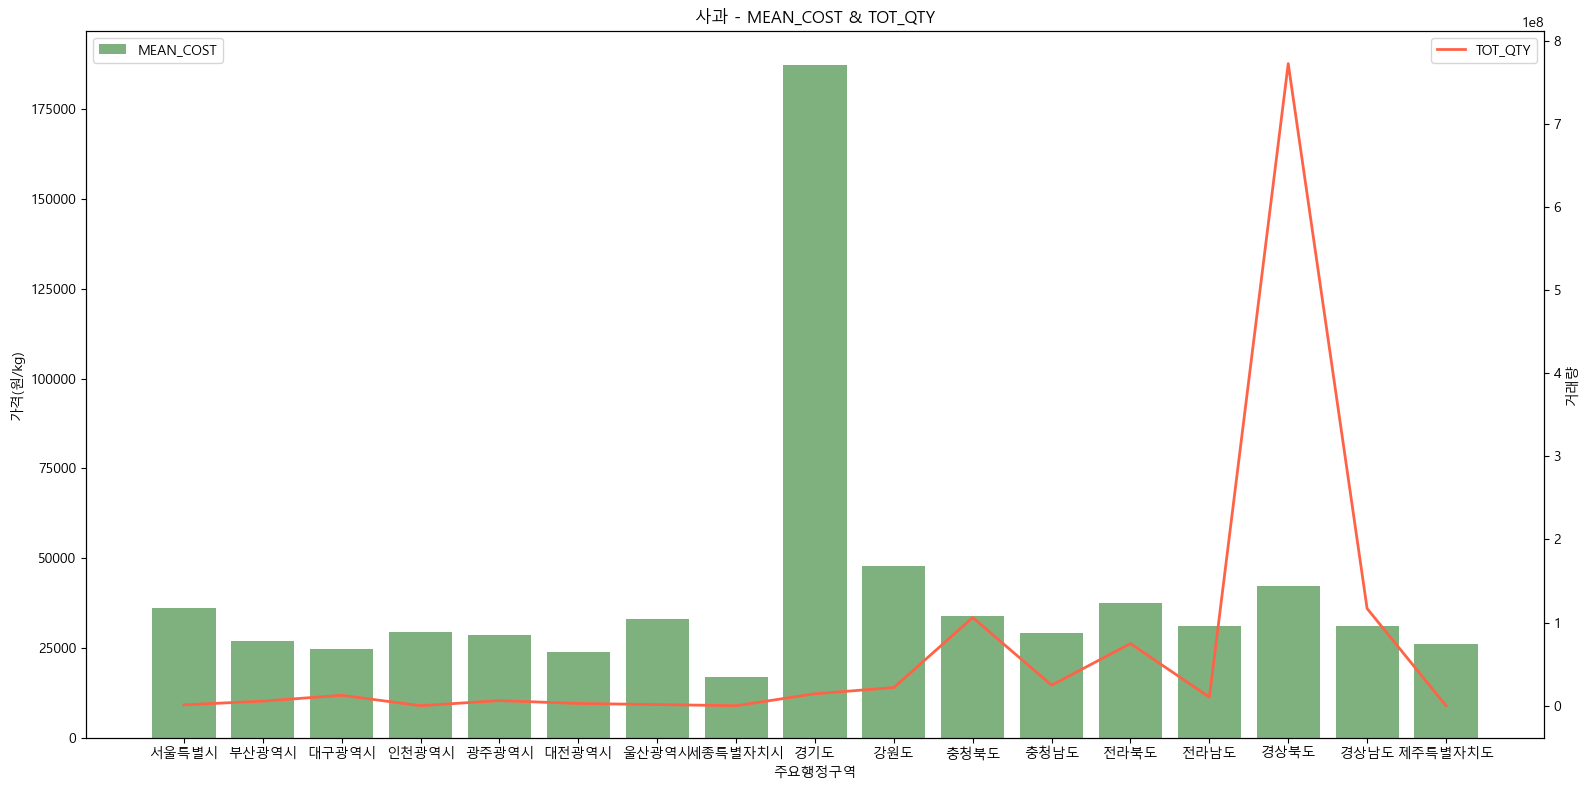

In [138]:
fig, ax1 = plt.subplots(figsize=(16, 8))

x = apple['SAN']

ax1.bar(x, apple['MEAN_COST'], color='#006400', alpha=0.5, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, apple['TOT_QTY'], color='#FF6347',linewidth=2, label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('사과 - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 참외

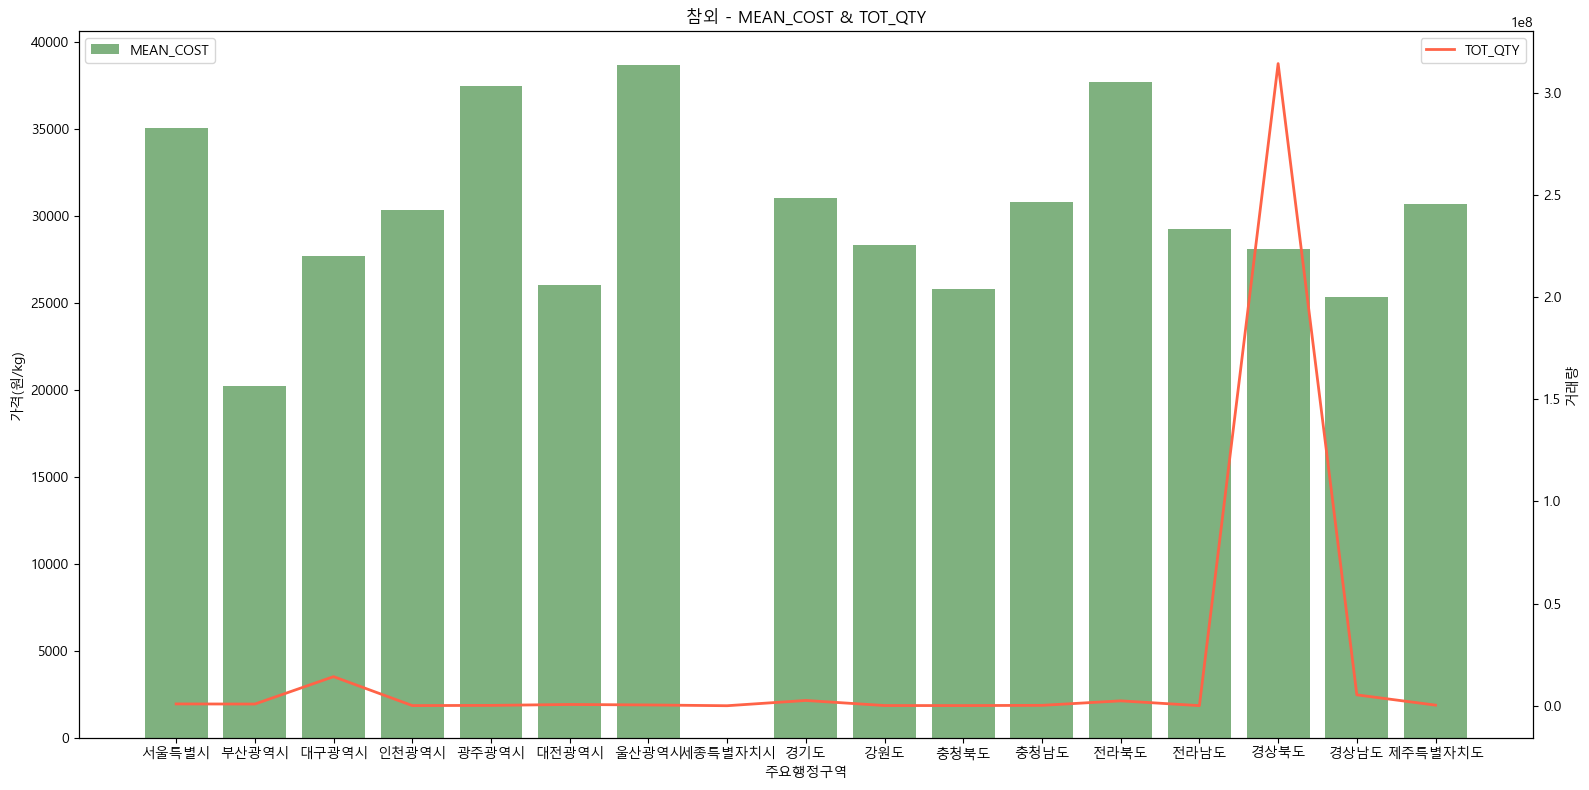

In [139]:
fig, ax1 = plt.subplots(figsize=(16, 8))

x = kmelon['SAN']

ax1.bar(x, kmelon['MEAN_COST'], color='#006400', alpha=0.5, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, kmelon['TOT_QTY'], color='#FF6347',linewidth=2, label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('참외 - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 감귤

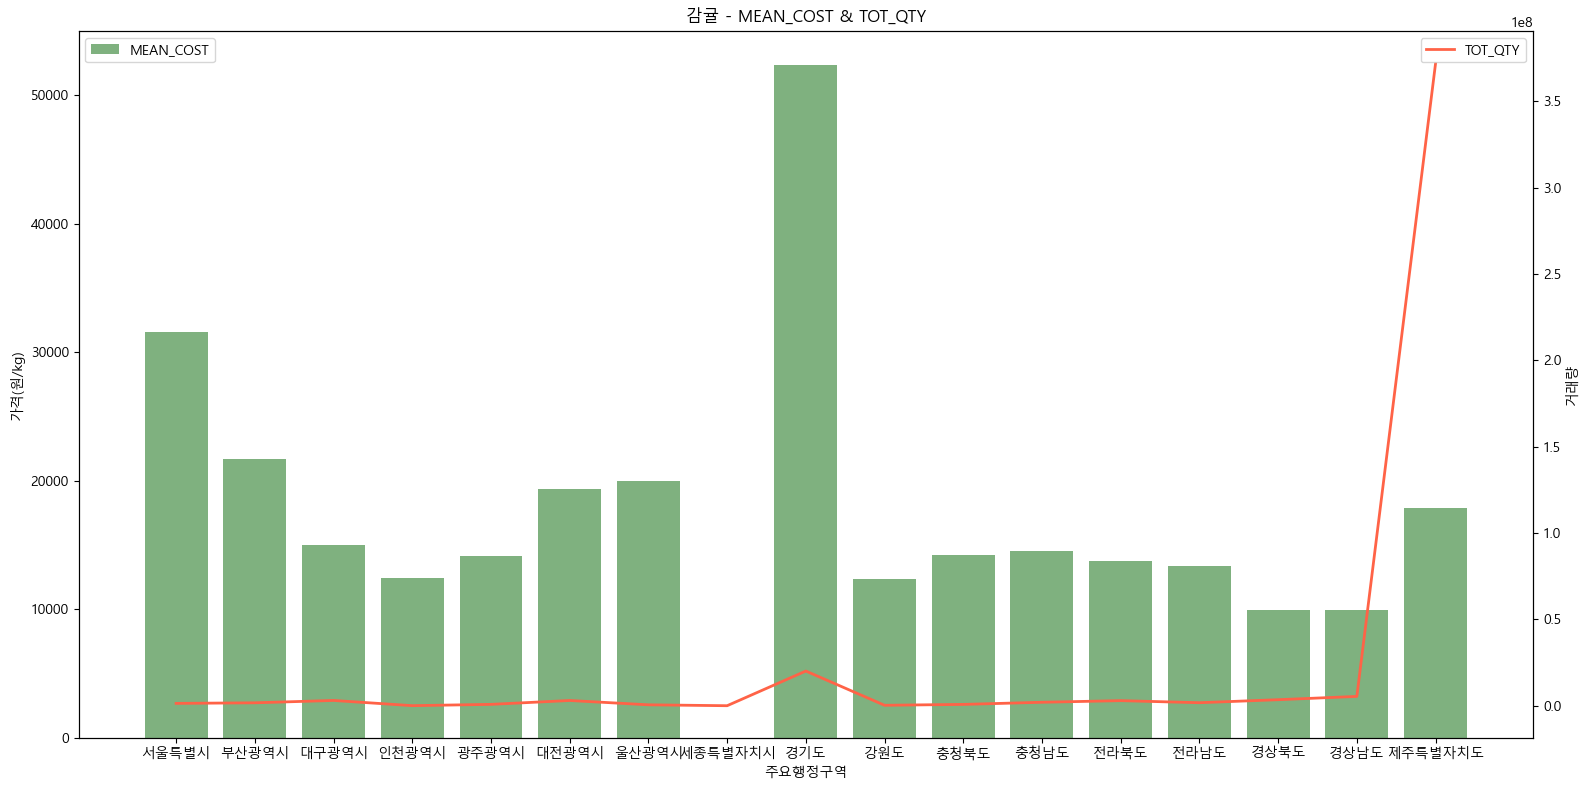

In [140]:
fig, ax1 = plt.subplots(figsize=(16, 8))

x = tangerine['SAN']

ax1.bar(x, tangerine['MEAN_COST'], color='#006400', alpha=0.5, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, tangerine['TOT_QTY'], color='#FF6347',linewidth=2, label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('감귤 - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 바나나

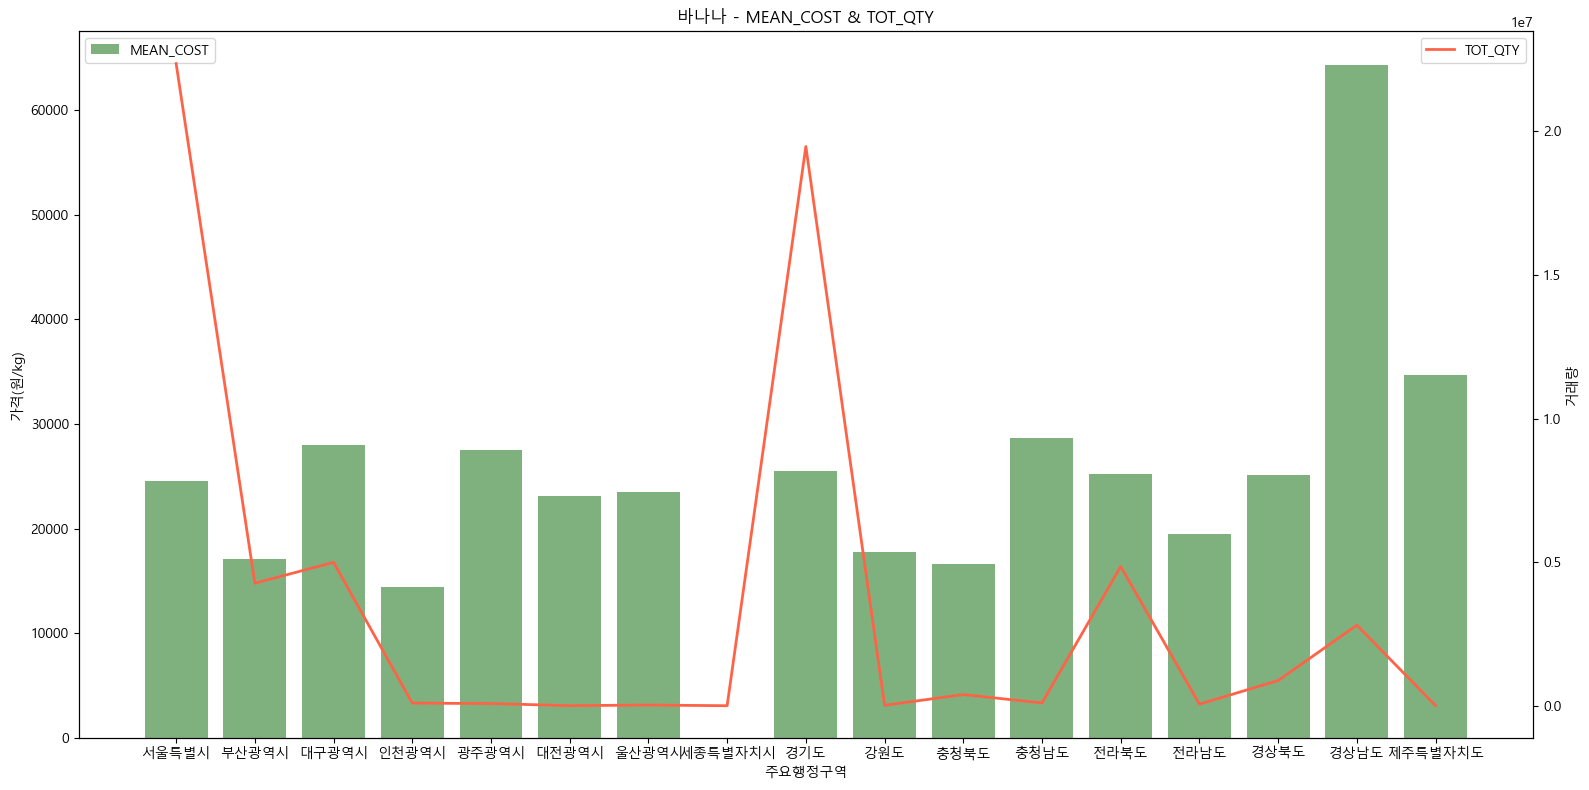

In [141]:
fig, ax1 = plt.subplots(figsize=(16, 8))

x = banana['SAN']

ax1.bar(x, banana['MEAN_COST'], color='#006400', alpha=0.5, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, banana['TOT_QTY'], color='#FF6347',linewidth=2, label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('바나나 - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 복숭아

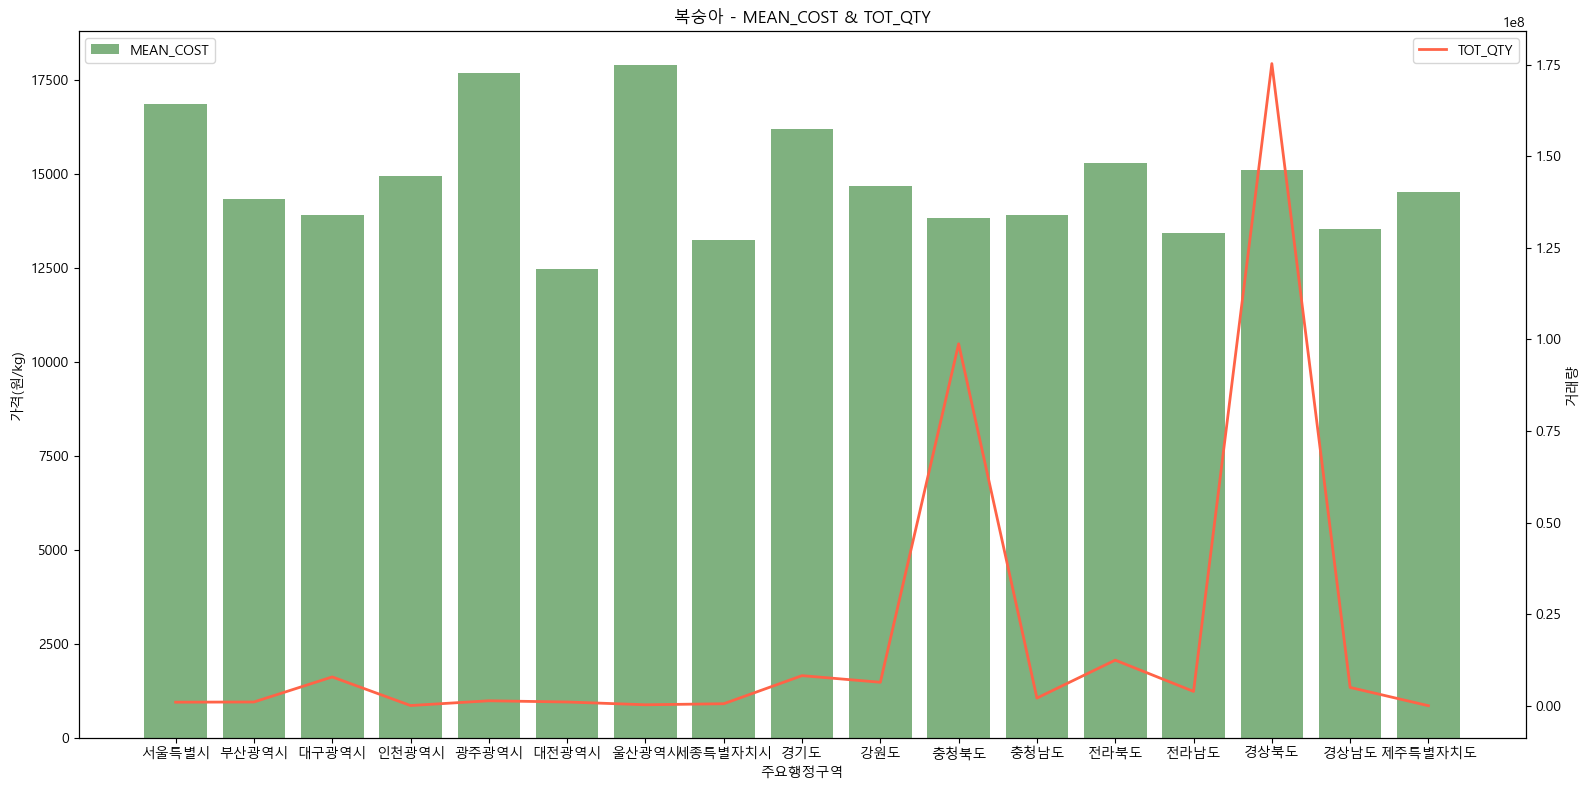

In [142]:
fig, ax1 = plt.subplots(figsize=(16, 8))

x = peach['SAN']

ax1.bar(x, peach['MEAN_COST'], color='#006400', alpha=0.5, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, peach['TOT_QTY'], color='#FF6347',linewidth=2, label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('복숭아 - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 키위

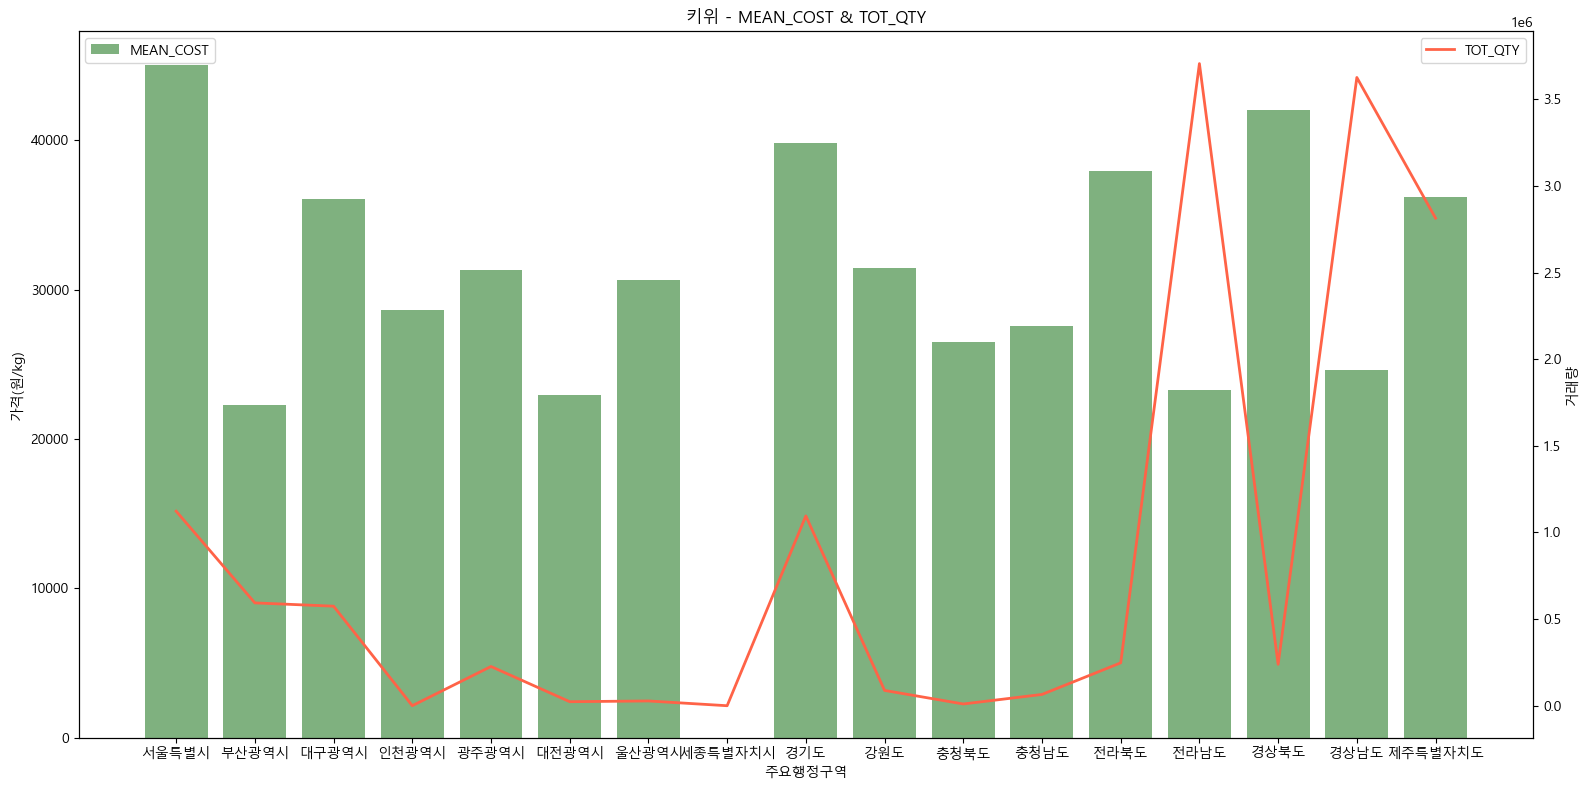

In [143]:
fig, ax1 = plt.subplots(figsize=(16, 8))

x = kiwi['SAN']

ax1.bar(x, kiwi['MEAN_COST'], color='#006400', alpha=0.5, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, kiwi['TOT_QTY'], color='#FF6347',linewidth=2, label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('키위 - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 자두

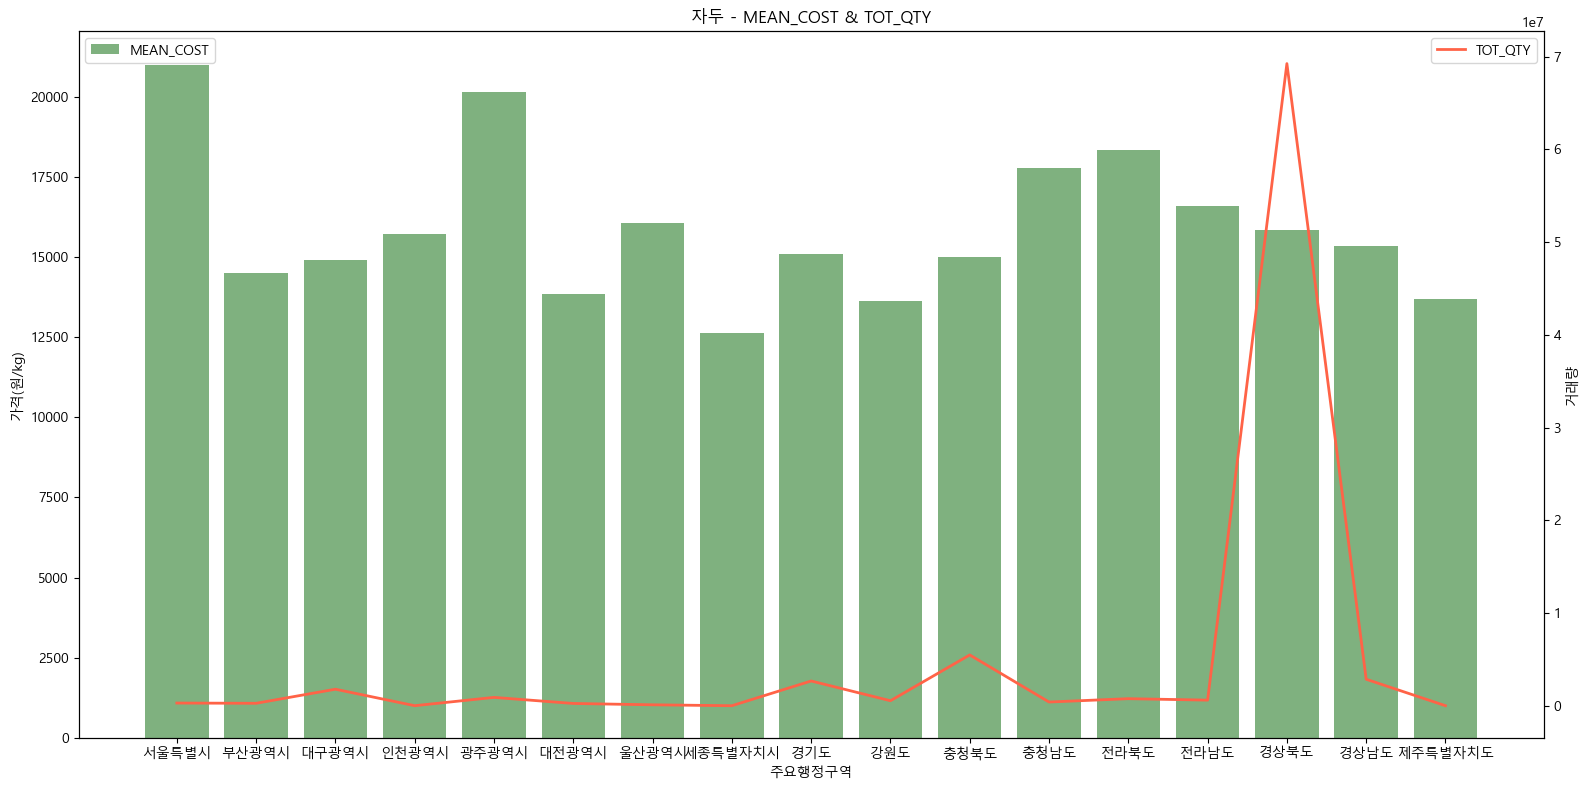

In [144]:
fig, ax1 = plt.subplots(figsize=(16, 8))

x = plum['SAN']

ax1.bar(x, plum['MEAN_COST'], color='#006400', alpha=0.5, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, plum['TOT_QTY'], color='#FF6347',linewidth=2, label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('자두 - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 파인애플

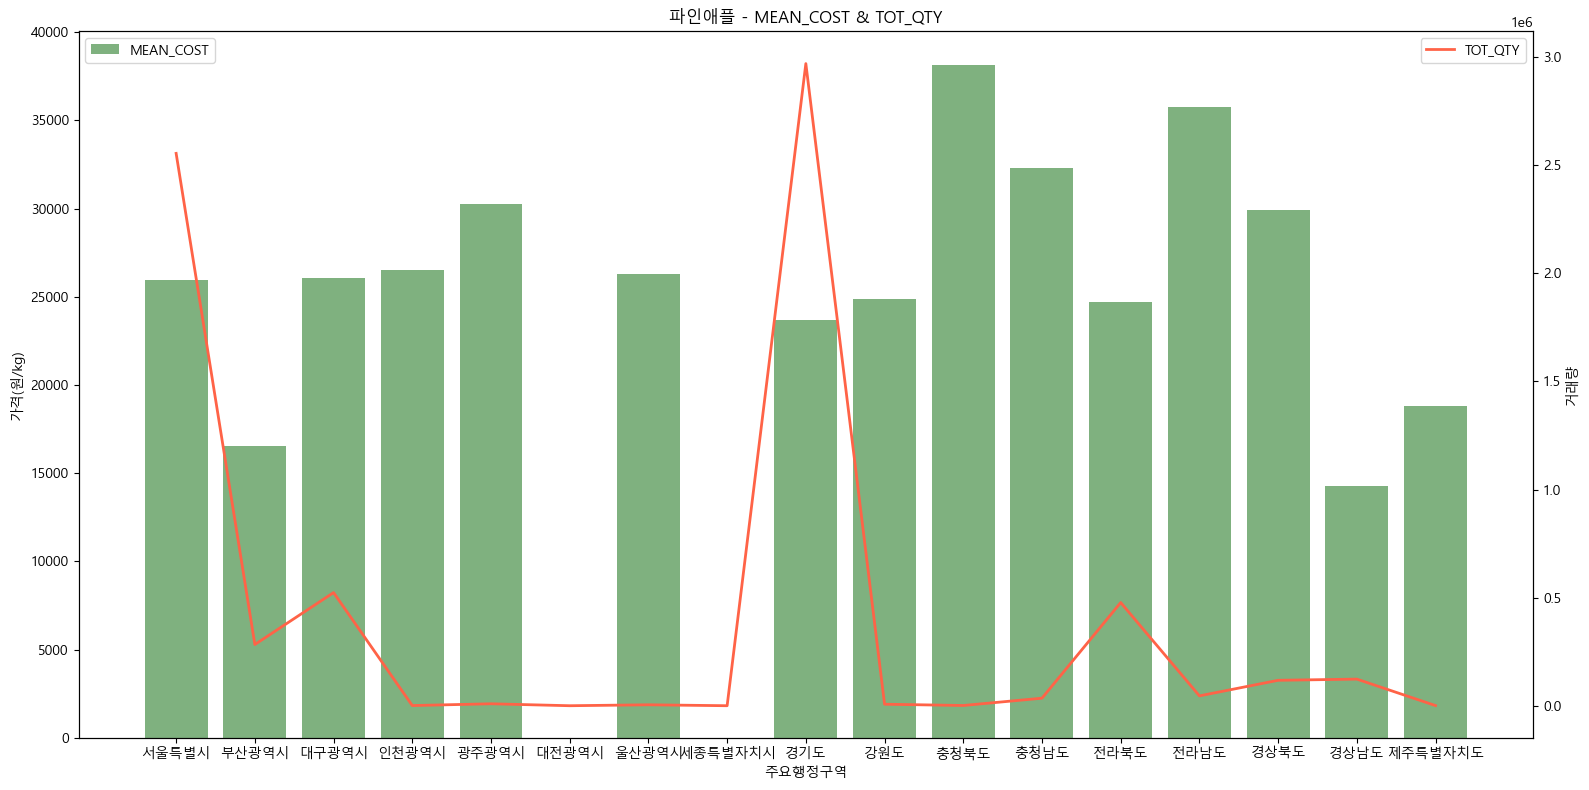

In [145]:
fig, ax1 = plt.subplots(figsize=(16, 8))

x = pineapple['SAN']

ax1.bar(x, pineapple['MEAN_COST'], color='#006400', alpha=0.5, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, pineapple['TOT_QTY'], color='#FF6347',linewidth=2, label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('파인애플 - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 행정구역별 가장 거래량 많은 품목

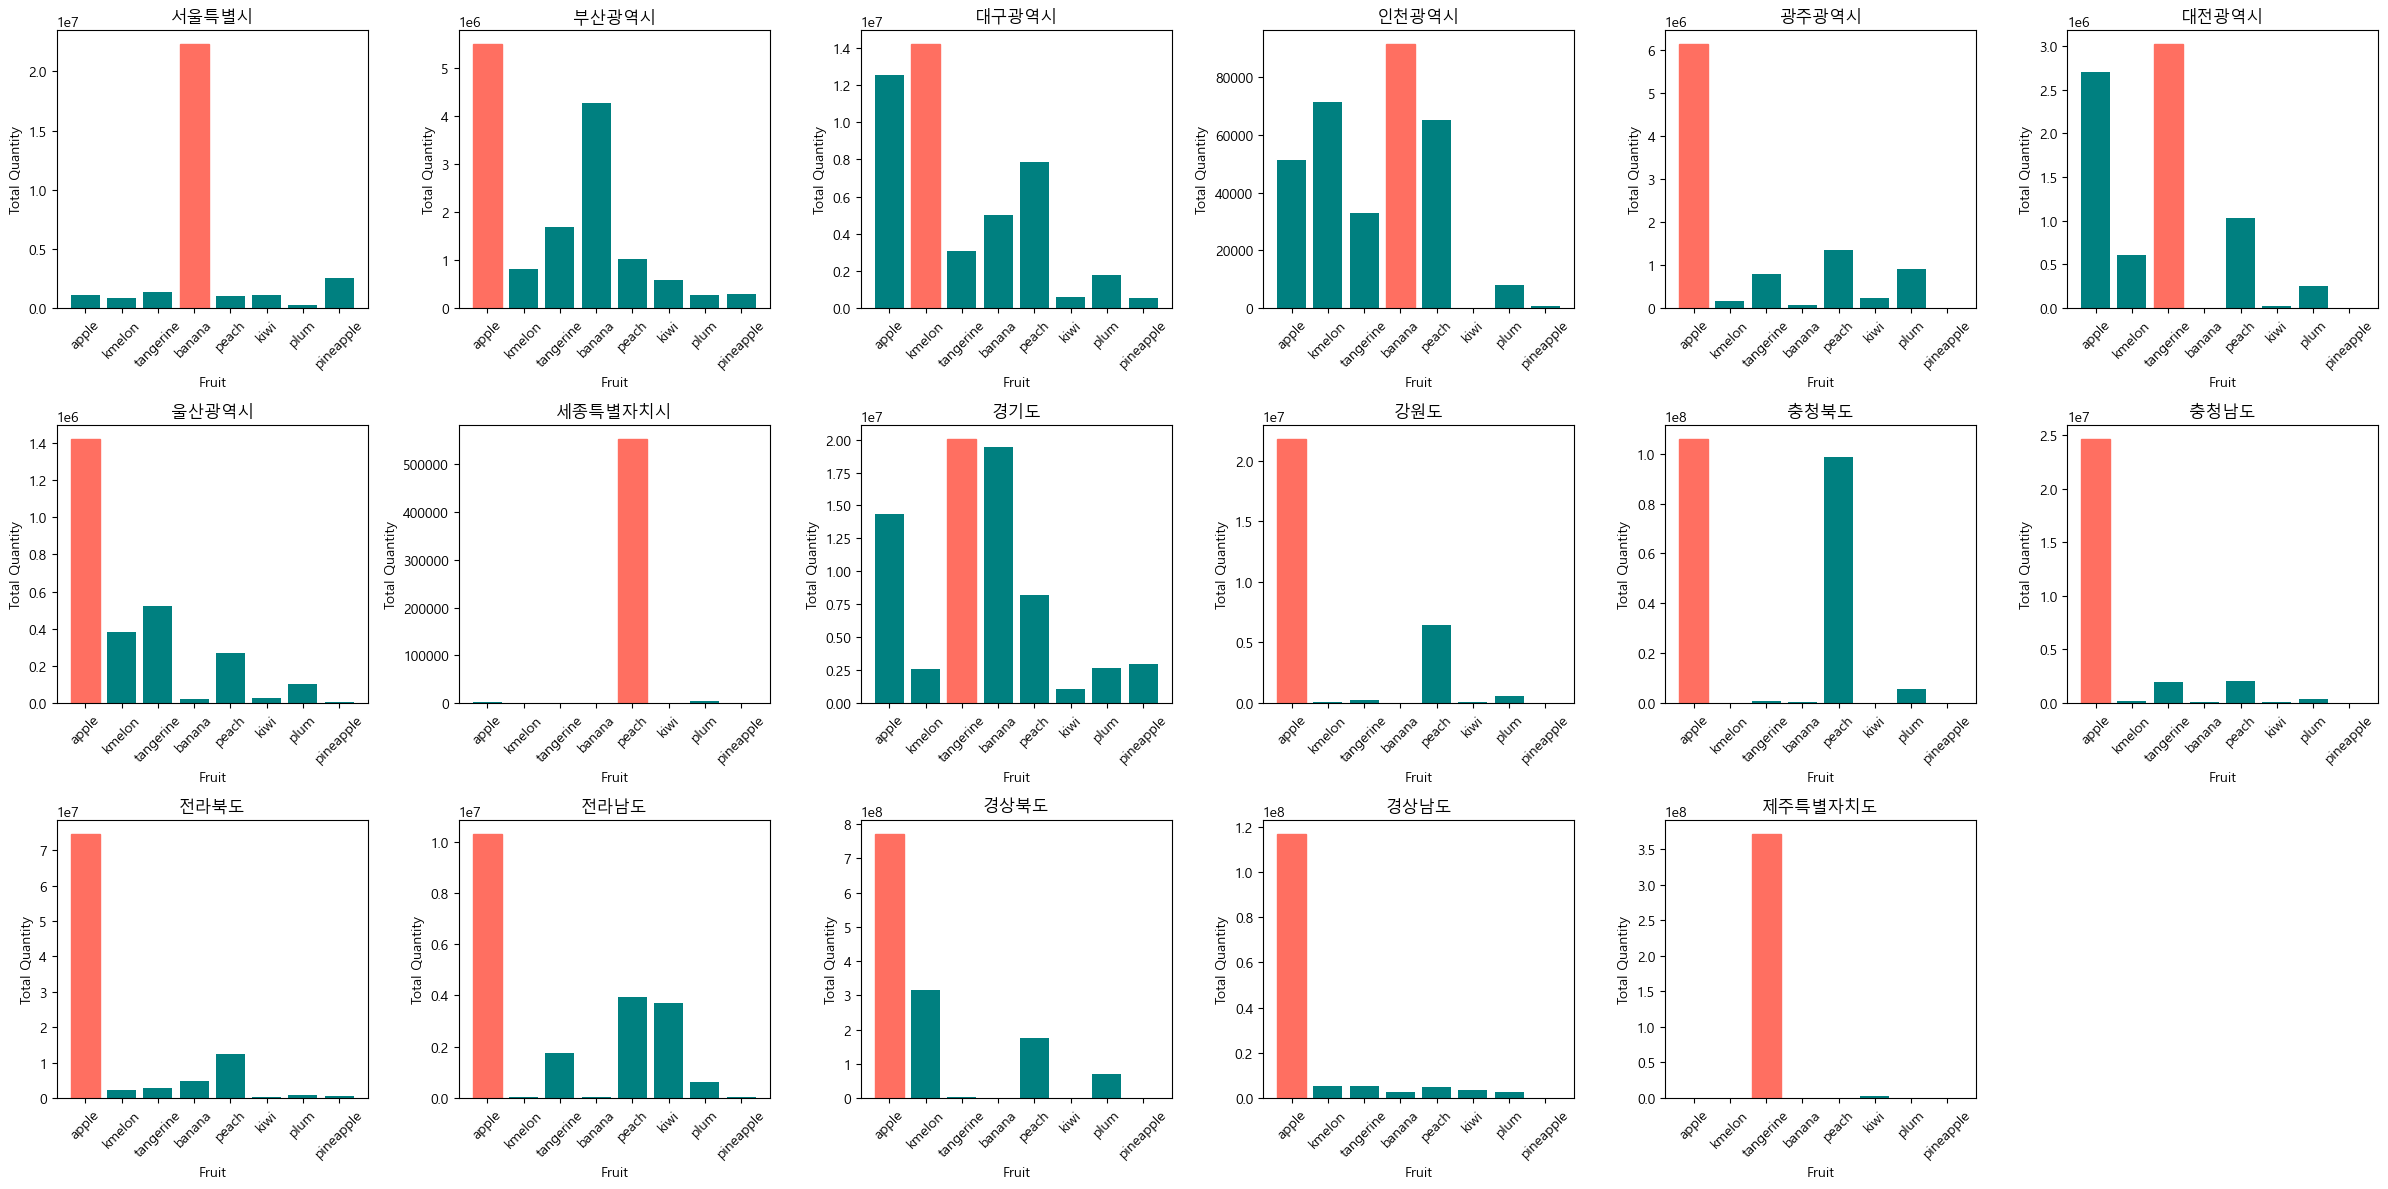

In [45]:
def prepare_data_for_san(fruit_dfs, new_san):
    all_fruit_data = []

    for san in new_san:
        san_data = []
        for name, df in fruit_dfs.items():
            filtered_df = df[df['SAN'] == san]
            if not filtered_df.empty:
                total_qty = filtered_df['TOT_QTY'].sum()
                san_data.append({'Fruit': name, 'Total_Qty': total_qty})

        if san_data:
            san_df = pd.DataFrame(san_data)
            all_fruit_data.append({'SAN': san, 'Data': san_df})

    return all_fruit_data

all_fruit_data = prepare_data_for_san(fruit_dfs, new_san)


fig, axes = plt.subplots(3, 6, figsize=(24, 12))
axes = axes.flatten()

for i, san_info in enumerate(all_fruit_data):
    ax = axes[i]
    san = san_info['SAN']
    san_df = san_info['Data']
    
    bars = ax.bar(san_df['Fruit'], san_df['Total_Qty'], color='#008080')
    
    max_qty = san_df['Total_Qty'].max()
    for bar in bars:
        if bar.get_height() == max_qty:
            bar.set_color('#FF6F61')  # 가장 많이 거래된 과일
    
    ax.set_title(san)
    ax.set_xlabel('Fruit')
    ax.set_ylabel('Total Quantity')
    ax.tick_params(axis='x', rotation=45)

for j in range(len(all_fruit_data), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()